In [1]:
import random
import sys
import os
sys.path.append(os.getcwd())
from visualizer.main import Visualizer 
from algorithms.quadtree import QuadTree, Rectangle, Point
from algorithms.quadtree.quadtree_visualization import quadtree_vis
from algorithms.quadtree.quadtree_query_visualization import visualize_quadtree_query



from algorithms.kd_tree.kd_class import *
from algorithms.kd_tree.kd_build_visualization import *
from algorithms.kd_tree.kd_query_visualization import * 

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import random

In [2]:
points = [(random.uniform(0, 800), random.uniform(0, 800)) for _ in range(100)]


In [3]:
screen_boundary = Rectangle(400, 400, 400, 400)
k = 4
vis= quadtree_vis(points, screen_boundary, k)


In [9]:
def points_visualization(points):
    vis = Visualizer()
    for pkt in points:
        vis.add_point(pkt, color = 'blue')
    return vis

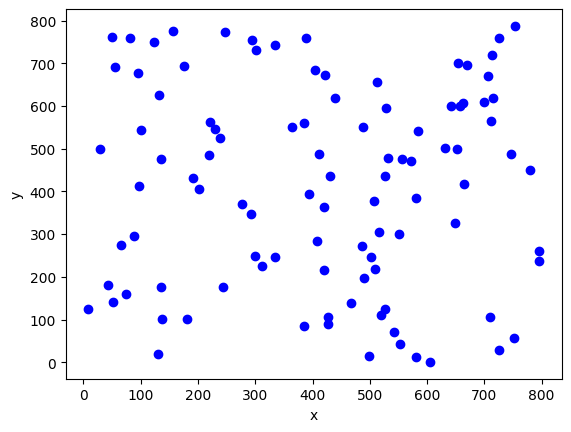

In [10]:
points_visualization(points).show()

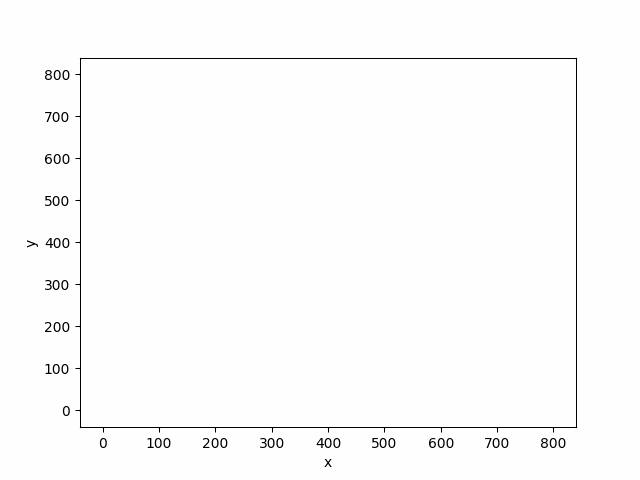

In [4]:
vis.show_gif(interval=200)



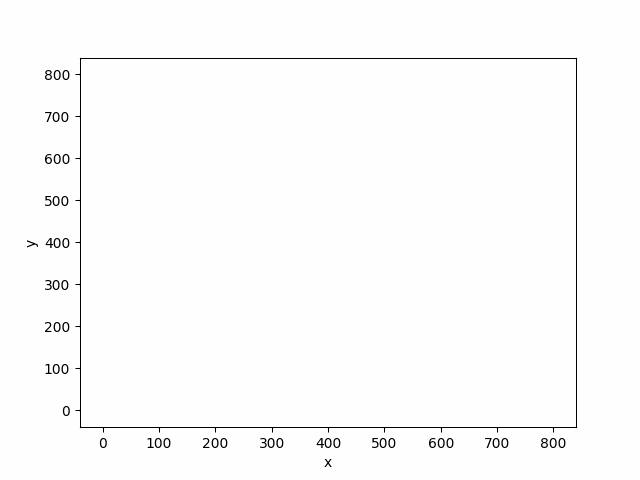

In [5]:

search_area = Rectangle(300, 300, 100, 100)
vis_query = visualize_quadtree_query(points, search_area, screen_boundary, 4)
vis_query.show_gif(interval=200) # Wolniej, żeby było widać skakanie po punktach

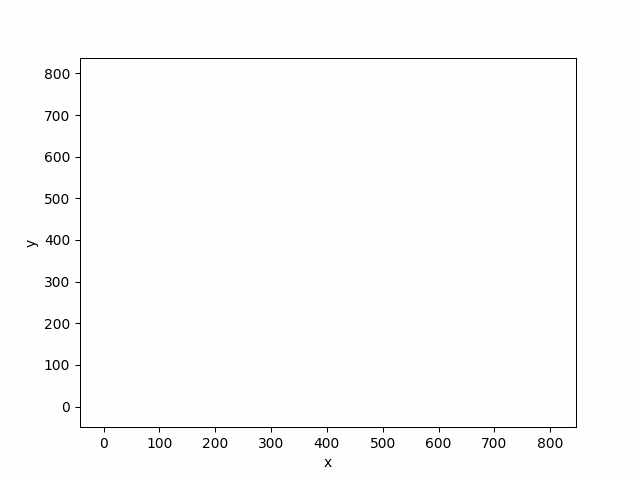

In [6]:
vis_kd = kd_build_visualization(points)
vis_kd.show_gif()

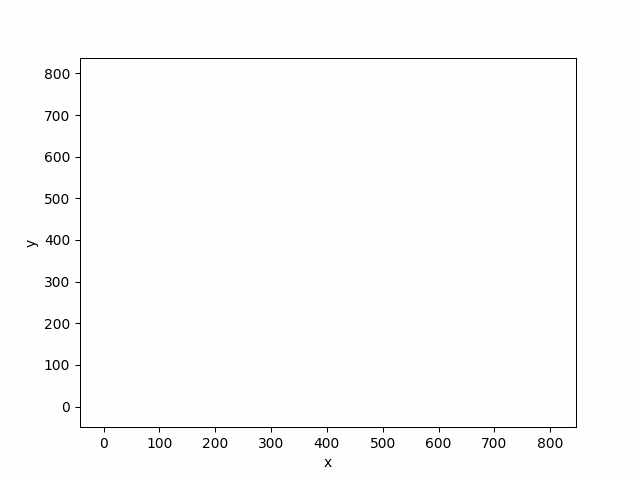

In [7]:
tree = KDTree(points)
query_box = (200, 600, 200, 500) # x_min, x_max, y_min, y_max
vis_kd2 = visualize_kdtree_query(tree, points, query_box)
vis_kd2.show_gif(interval=150)

In [18]:
from collections import deque
from visualizer.main import Visualizer
from algorithms.quadtree.quadtree import QuadTree, Rectangle, Point

def visualize_search_result(points, search_area, found_points):
    vis = Visualizer()
    
    screen_boundary = Rectangle(400, 400, 400, 400)
    k = 4

    points_objects = []
    for p_data in points:
        if isinstance(p_data, (tuple, list)):
            points_objects.append(Point(p_data[0], p_data[1]))
        else:
            points_objects.append(p_data)

    qt = QuadTree(screen_boundary, k)
    for p in points_objects:
        qt.insert(p)

    vis_coords = [(p.x, p.y) for p in points_objects]
    vis.add_point(vis_coords, color='blue')

    queue = deque([qt])
    grid_lines = []
    
    bx, by, bw, bh = screen_boundary.x, screen_boundary.y, screen_boundary.w, screen_boundary.h
    p1, p2 = (bx - bw, by - bh), (bx + bw, by - bh)
    p3, p4 = (bx + bw, by + bh), (bx - bw, by + bh)
    vis.add_line_segment(((p1, p2)), color='black')
    vis.add_line_segment(((p2, p3)), color='black')
    vis.add_line_segment(((p3, p4)), color='black')
    vis.add_line_segment(((p4, p1)), color='black')

    while queue:
        node = queue.popleft()
        if node.divided:
            nx, ny = node.boundary.x, node.boundary.y
            nw, nh = node.boundary.w, node.boundary.h
            grid_lines.append(((nx - nw, ny), (nx + nw, ny)))
            grid_lines.append(((nx, ny - nh), (nx, ny + nh)))
            
            queue.append(node.northeast)
            queue.append(node.northwest)
            queue.append(node.southeast)
            queue.append(node.southwest)
            
    vis.add_line_segment(grid_lines, color='lightgray', linewidth=1)

    qx, qy, qw, qh = search_area.x, search_area.y, search_area.w, search_area.h
    q_p1 = (qx - qw, qy - qh)
    q_p2 = (qx + qw, qy - qh)
    q_p3 = (qx + qw, qy + qh)
    q_p4 = (qx - qw, qy + qh)
    
    query_lines = [
        (q_p1, q_p2), (q_p2, q_p3), (q_p3, q_p4), (q_p4, q_p1)
    ]
    vis.add_line_segment(query_lines, color='purple', linewidth=2)

    if found_points:
        found_coords = []
        for p_data in found_points:
            if isinstance(p_data, (tuple, list)):
                found_coords.append((p_data[0], p_data[1]))
            else:
                found_coords.append((p_data.x, p_data.y))
        
        vis.add_point(found_coords, color='green', s=30)

    return vis

In [15]:
def get_points_in_area(algorithm, points_list, search_area, k=4):
    if algorithm == 'quadtree':
        screen_boundary = Rectangle(400, 400, 400, 400)
        qt = QuadTree(screen_boundary, k)
    
        for p_data in points_list:
            if isinstance(p_data, (tuple, list)):
                qt.insert(Point(p_data[0], p_data[1]))
            else:
                qt.insert(p_data)
    
        found_points = []
        qt.query(search_area, found_points)
    
        return found_points
    elif algorithm == "kdtree":
        return

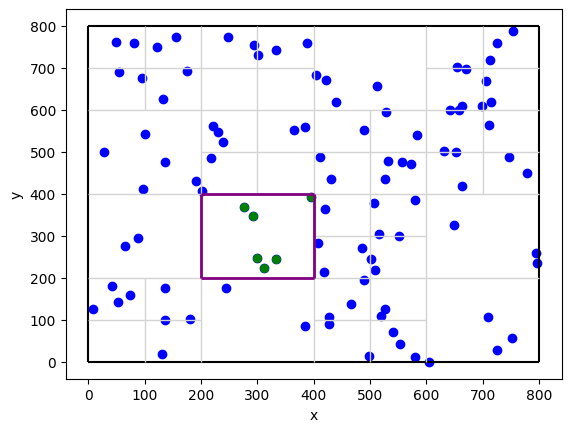

In [19]:
found_points = get_points_in_area(points, search_area, 4)
vis4 = visualize_search_result(points, search_area, found_points)
vis4.show()